In [38]:
import tensorflow as tf

In [39]:
from tensorflow import keras

In [40]:
import matplotlib.pyplot as plt

In [41]:
%matplotlib inline
import numpy as np

In [42]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [43]:
len(X_train)

60000

In [44]:
len(X_test)

10000

In [45]:
X_train[0].shape

(28, 28)

In [46]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

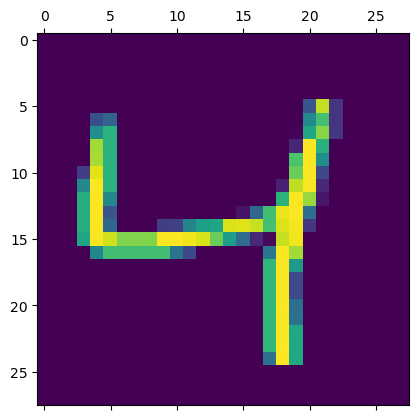

In [47]:
plt.matshow(X_train[2])

In [48]:
y_train[2]

4

In [49]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [50]:
X_train.shape

(60000, 28, 28)

In [51]:
X_train = X_train/255
X_test = X_test/255

In [54]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)

In [55]:
X_train_flattened

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [56]:
X_train_flattened.shape

(60000, 784)

In [57]:
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [58]:
X_test_flattened.shape

(10000, 784)

In [59]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [60]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',  # Corrected loss function name
    metrics=['accuracy']
)

model.fit(X_train_flattened, y_train, epochs=5)


Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4656 - accuracy: 0.8775
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3041 - accuracy: 0.9155
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2834 - accuracy: 0.9213
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2730 - accuracy: 0.9236
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2668 - accuracy: 0.9258


In [61]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2678 - accuracy: 0.9257


[0.26781976222991943, 0.9257000088691711]

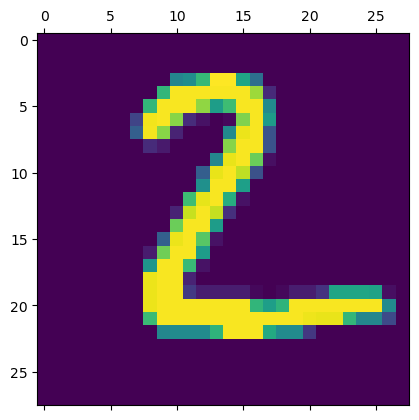

In [69]:
plt.matshow(X_test[1])

In [70]:
y_predicted = model.predict(X_test_flattened)
y_predicted[1]

313/313 [==============================] - 1s 2ms/step


array([4.9482980e-01, 2.9207130e-03, 9.9920511e-01, 3.6896592e-01,
       5.3322513e-10, 8.6924314e-01, 9.3164140e-01, 1.7339190e-12,
       1.2246537e-01, 2.7665847e-09], dtype=float32)

In [72]:
np.argmax(y_predicted[1])

2

In [73]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [74]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [77]:
cm =tf.math.confusion_matrix(labels = y_test, predictions = y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 960,    0,    1,    2,    0,    5,    8,    3,    1,    0],
       [   0, 1111,    3,    2,    0,    2,    4,    2,   11,    0],
       [   6,    7,  921,   16,   11,    6,   13,   12,   37,    3],
       [   3,    0,   17,  922,    1,   29,    3,   10,   14,   11],
       [   1,    1,    2,    1,  915,    0,   13,    4,   10,   35],
       [  11,    2,    2,   24,    8,  791,   18,    5,   25,    6],
       [   8,    3,    2,    2,    7,   10,  923,    2,    1,    0],
       [   1,    5,   21,    7,    6,    0,    0,  956,    2,   30],
       [   9,    7,    6,   23,    9,   41,   11,   13,  842,   13],
       [  11,    7,    1,   11,   28,    9,    0,   23,    3,  916]])>

Text(95.72222222222221, 0.5, 'Truth')

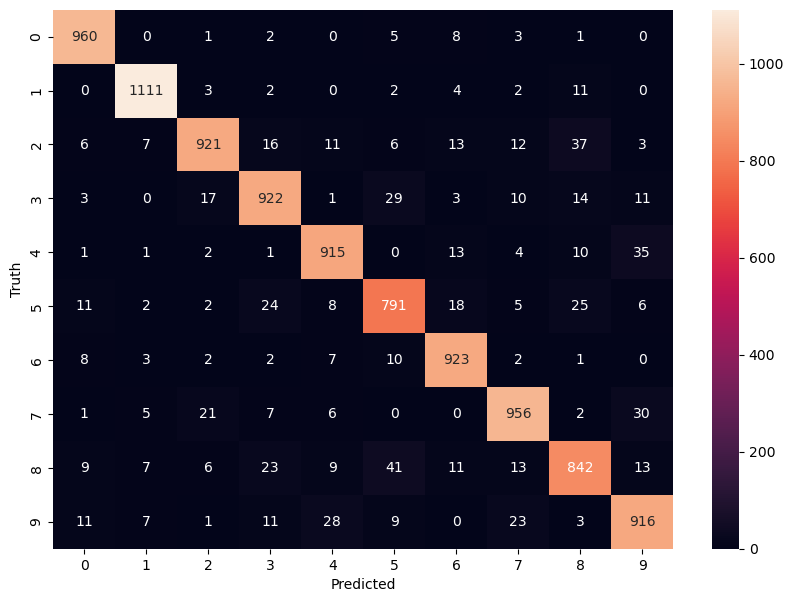

In [78]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [80]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',  # Corrected loss function name
    metrics=['accuracy']
)

model.fit(X_train_flattened, y_train, epochs=5)


Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2818 - accuracy: 0.9199
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1281 - accuracy: 0.9623
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0899 - accuracy: 0.9730
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0671 - accuracy: 0.9799
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0531 - accuracy: 0.9835


In [81]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0795 - accuracy: 0.9750


[0.07949863374233246, 0.9750000238418579]

In [82]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_predicted_labels)

313/313 [==============================] - 1s 2ms/step


Text(95.72222222222221, 0.5, 'Truth')

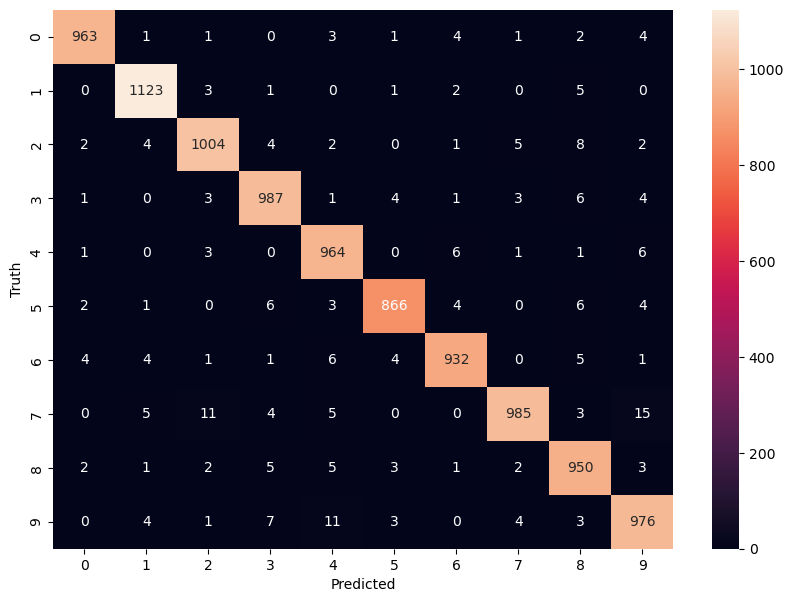

In [83]:
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [84]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',  # Corrected loss function name
    metrics=['accuracy']
)

model.fit(X_train, y_train, epochs=5)


Epoch 1/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2684 - accuracy: 0.9242
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1187 - accuracy: 0.9650
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0839 - accuracy: 0.9745
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0646 - accuracy: 0.9806
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0511 - accuracy: 0.9840
